In [125]:
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
d = pandas.read_csv('cattleTS.csv')
print(d.shape)
print(d.columns)

(23639, 10)
Index(['geographicAreaFS', 'Geographic Area', 'measuredItemFS', 'Item',
       'measuredElementFS', 'Element', 'timePointYears', 'Year', 'Value',
       'Status'],
      dtype='object')


Let's look at Argentina's time series

In [68]:
argentina = d[d['Geographic Area'] == 'Argentina']
argentina.shape
argentina

geographicAreaFS Geographic Area  measuredItemFS           Item  \
624                 9       Argentina             866         Cattle   
625                 9       Argentina             866         Cattle   
626                 9       Argentina             866         Cattle   
627                 9       Argentina             866         Cattle   
628                 9       Argentina             866         Cattle   
629                 9       Argentina             866         Cattle   
630                 9       Argentina             866         Cattle   
631                 9       Argentina             866         Cattle   
632                 9       Argentina             866         Cattle   
633                 9       Argentina             866         Cattle   
634                 9       Argentina             866         Cattle   
635                 9       Argentina             866         Cattle   
636                 9       Argentina             866         Cattle   
637                 9       Argentina             866         Cattle   
638                 9       Argentina             866         Cattle   
639                 9       Argentina             866         Cattle   
640                 9       Argentina             866         Cattle   
641                 9       Argentina             866         Cattle   
642                 9       Argentina             866         Cattle   
643                 9       Argentina             866         Cattle   
644                 9       Argentina             866         Cattle   
645                 9       Argentina             866         Cattle   
646                 9       Argentina             866         Cattle   
647                 9       Argentina             866         Cattle   
648                 9       Argentina             866         Cattle   
649                 9       Argentina             866         Cattle   
650                 9       Argentina             866         Cattle   
651                 9       Argentina             866         Cattle   
652                 9       Argentina             866         Cattle   
653                 9       Argentina             866         Cattle   
..                ...             ...             ...            ...   
744                 9       Argentina             867  Beef and Veal   
745                 9       Argentina             867  Beef and Veal   
746                 9       Argentina             867  Beef and Veal   
747                 9       Argentina             867  Beef and Veal   
748                 9       Argentina             867  Beef and Veal   
749                 9       Argentina             867  Beef and Veal   
750                 9       Argentina             867  Beef and Veal   
751                 9       Argentina             867  Beef and Veal   
752                 9       Argentina             867  Beef and Veal   
753                 9       Argentina             867  Beef and Veal   
754                 9       Argentina             867  Beef and Veal   
755                 9       Argentina             867  Beef and Veal   
756                 9       Argentina             867  Beef and Veal   
757                 9       Argentina             867  Beef and Veal   
758                 9       Argentina             867  Beef and Veal   
759                 9       Argentina             867  Beef and Veal   
760                 9       Argentina             867  Beef and Veal   
761                 9       Argentina             867  Beef and Veal   
762                 9       Argentina             867  Beef and Veal   
763                 9       Argentina             867  Beef and Veal   
764                 9       Argentina             867  Beef and Veal   
765                 9       Argentina             867  Beef and Veal   
766                 9       Argentina             867  Beef and Veal   
767                 9       Argentina        

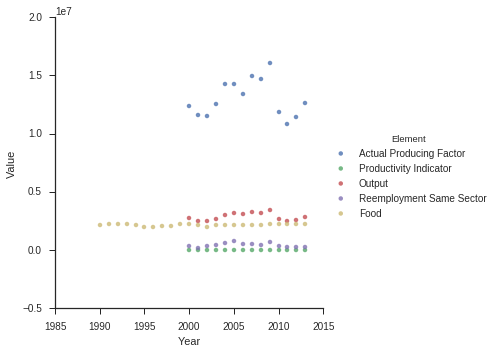

In [80]:
%matplotlib inline
to_plot = argentina[argentina['Item'] != 'Cattle']
sns.lmplot(x='Year', y='Value', data=to_plot, hue='Element', fit_reg=False)

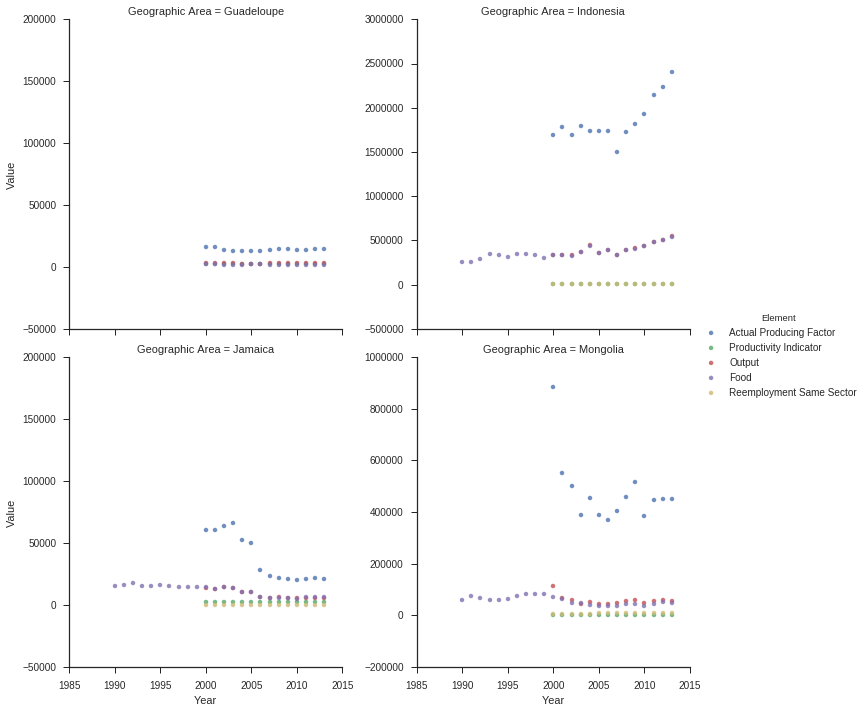

In [121]:
# Let's plot a sample of 4 countries
to_plot = d[d['Item'] != 'Cattle']
countries = np.random.choice(d['Geographic Area'], size=4)
filter = [(i in countries) for i in to_plot['Geographic Area']]
to_plot = to_plot[filter]
sns.lmplot(x='Year', y='Value', data=to_plot, hue='Element',
           col='Geographic Area', col_wrap=2, fit_reg=False, sharey = False)

In [190]:
def linear_variance(y):
    x = np.arange(y.size)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=x, y=y)
    return(np.var(y)*(1-r_value**2))

y = np.random.normal(size=10000)*10
print(linear_variance(y))
y = y + np.arange(y.size)
print(linear_variance(y))

102.775400158
102.77540015


In [202]:
grouped_data = d[d['Item'] != 'Cattle'].groupby(by=('Geographic Area', 'Element'))
grouped_data.agg(linear_variance)

Value  Year  \
Geographic Area      Element                                        
Afghanistan          Actual Producing Factor   3.464493e+09     0   
                     Food                      3.647966e+08     0   
                     Output                    1.126234e+08     0   
                     Productivity Indicator    1.188002e-01     0   
Albania              Actual Producing Factor   6.529769e+08     0   
                     Food                      1.528532e+07     0   
                     Output                    1.306498e+07     0   
                     Productivity Indicator    8.752746e+02     0   
Algeria              Actual Producing Factor   8.390091e+08     0   
                     Food                      3.887204e+07     0   
                     Output                    4.070496e+07     0   
                     Productivity Indicator    2.604068e+03     0   
American Samoa       Actual Producing Factor   1.305808e+00     0   
                     Food                      1.451546e+03     0   
                     Output                    2.938069e-02     0   
                     Productivity Indicator    0.000000e+00     0   
Angola               Actual Producing Factor   6.816452e+08     0   
                     Food                      5.031392e+07     0   
                     Output                    5.019593e+07     0   
                     Productivity Indicator    4.154772e+03     0   
                     Reemployment Same Sector  4.929862e+03     0   
Antigua and Barbuda  Actual Producing Factor   4.067571e+05     0   
                     Food                      7.394433e+03     0   
                     Output                    1.389820e+04     0   
                     Productivity Indicator    9.791046e+01     0   
Argentina            Actual Producing Factor   2.326998e+12     0   
                     Food                      6.042302e+09     0   
                     Output                    8.501104e+10     0   
                     Productivity Indicator    2.654340e+03     0   
                     Reemployment Same Sector  2.439688e+10     0   
...                                                     ...   ...   
Viet Nam             Actual Producing Factor   1.119843e+10     0   
                     Food                      1.215278e+09     0   
                     Output                    3.289486e+08     0   
                     Productivity Indicator    1.746197e+02     0   
Wallis and Futuna Is Actual Producing Factor   0.000000e+00     0   
                     Food                      1.959184e-02     0   
                     Output                    1.959184e-02     0   
                     Productivity Indicator    4.897959e+03     0   
Yemen                Actual Producing Factor   1.306633e+09     0   
                     Food                      4.891385e+07     0   
                     Output                    1.301432e+07     0   
                     Productivity Indicator    5.277951e+01     0   
Yemen Arab Republic  Actual Producing Factor   1.071434e+09     0   
                     Food                      1.533469e+07     0   
                     Output                    1.533469e+07     0   
                     Productivity Indicator    7.594286e+04     0   
Yemen, Democratic    Actual Producing Factor   2.038400e+07     0   
                     Food                      5.099184e+05     0   
                     Output                    5.099184e+05     0   
                     Productivity Indicator    1.327359e+05     0   
Zambia               Actual Producing Factor   4.195686e+08     0   
                     Food                      2.416912e+07     0   
                     Output                    1.074096e+07     0   
                     Productivity Indicator    0.000000e+00     0   
                     Reemployment Same Sector  0.000000e+00     0   
Zimbabwe             Actual Producing Factor   1.248